<a href="https://colab.research.google.com/github/phuongnt3391/Timeseries/blob/main/Linear_regression_and_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('sales_data.csv')

In [3]:
df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [4]:
df.dtypes

Years     object
Sales    float64
dtype: object

In [5]:
df['Years'] = pd.to_datetime(df['Years'])

In [6]:
df.dtypes

Years    datetime64[ns]
Sales           float64
dtype: object

In [7]:
df['year'] = df['Years'].dt.year

In [8]:
df['month_name'] = df['Years'].dt.month_name()

In [9]:
df.head()

,Years,Sales,year,month_name
0,2001-01-01,139.7,2001,January
1,2001-02-01,114.3,2001,February
2,2001-03-01,101.6,2001,March
3,2001-04-01,152.4,2001,April
4,2001-05-01,215.9,2001,May


In [10]:
df['year'].nunique()

6

In [11]:
df['time'] = np.arange(1,73,1)

In [12]:
df.head()

,Years,Sales,year,month_name,time
0,2001-01-01,139.7,2001,January,1
1,2001-02-01,114.3,2001,February,2
2,2001-03-01,101.6,2001,March,3
3,2001-04-01,152.4,2001,April,4
4,2001-05-01,215.9,2001,May,5


In [13]:
df_train = df.loc[:48]
df_test =df.loc[48:]

In [21]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Years       49 non-null     datetime64[ns]
 1   Sales       49 non-null     float64       
 2   year        49 non-null     int64         
 3   month_name  49 non-null     object        
 4   time        49 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 2.0+ KB


In [15]:
X_train = df_train[['time']].values
X_test=df_test[['time']].values

In [16]:
y_train=df_train['Sales'].values
y_test=df_test['Sales'].values

In [17]:
import sklearn
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_fittedvalues= model.predict(X_train)

In [19]:
y_forecast = model.predict(X_test)

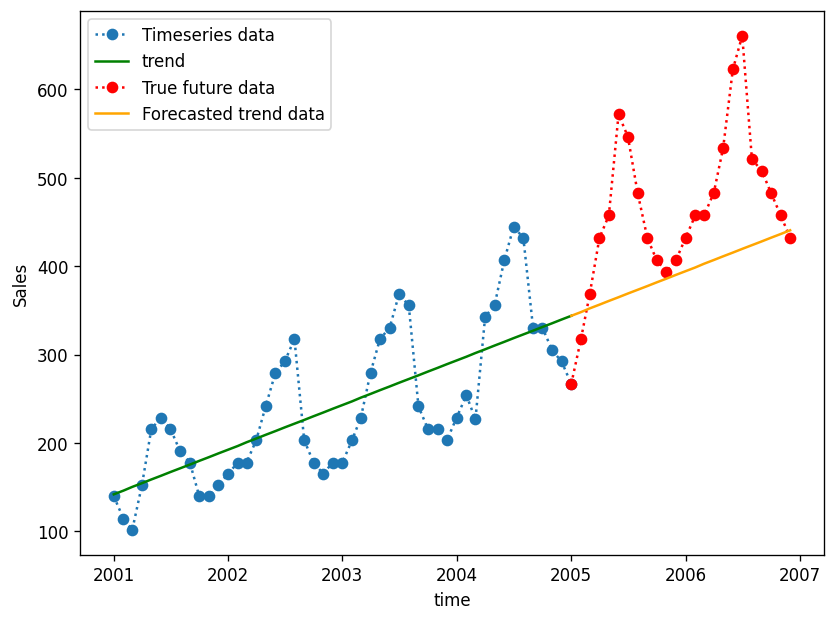

In [20]:
plt.figure(figsize =(8,6),dpi=120)
plt.plot(df_train['Years'],y_train,'o:')
plt.plot(df_train['Years'],y_fittedvalues,'g')

plt.plot(df_test['Years'],y_test,'ro:')
plt.plot(df_test['Years'],y_forecast,'b',color='orange')
plt.legend(['Timeseries data','trend','True future data','Forecasted trend data'])

plt.xlabel('time')
plt.ylabel('Sales')

plt.show()

Confidence interval
CI = $ \mu +- ME $


ME = z * SE

z = 1.96 (for 95% CI)

SE: standard deviation of the error 

Confidence interval: mean +- Margin of Error

In [23]:
error = y_train - y_fittedvalues
se = error.std()
ME = 1.96 * se

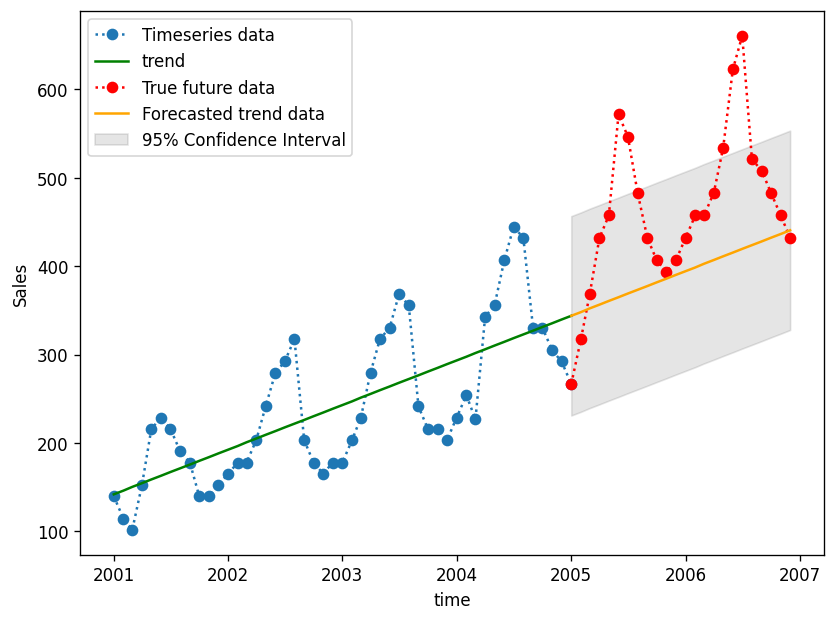

In [25]:
# Visualize the data
plt.figure(figsize =(8,6),dpi=120)
plt.plot(df_train['Years'],y_train,'o:')
plt.plot(df_train['Years'],y_fittedvalues,'g')

plt.plot(df_test['Years'],y_test,'ro:')
# Forecasted data
plt.plot(df_test['Years'],y_forecast,'b',color='orange')
# Margin of data
ci_plus = y_forecast + ME
ci_minus = y_forecast - ME
plt.fill_between(df_test['Years'],ci_plus,ci_minus,alpha=0.1, color='black' )
plt.legend(['Timeseries data','trend','True future data','Forecasted trend data','95% Confidence Interval'])

plt.xlabel('time')
plt.ylabel('Sales')

plt.show()

In [30]:
forecast_mean = model.predict(np.array([[61]]))
forecast_mean

array([394.20269388])

In [27]:
df[df['time']==61]

,Years,Sales,year,month_name,time
60,2006-01-01,431.8,2006,January,61


In [32]:
forecast_mean - ME, forecast_mean + ME

(array([281.47422627]), array([506.93116149]))

The forcasted mean is 394.20, in the range of (281.47, 506,93)
The true value is 431.8